In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

import riskfolio as rp

import matplotlib.pyplot as plt

In [3]:
cryptos = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'XRP-USD']
benchmark = 'BTC-USD'

start, end = '2020-01-01', '2023-01-01'
crypto_data = yf.download(cryptos + [benchmark],
                          start=start,
                          end=end)['Close']

returns = crypto_data.pct_change().dropna()

[*********************100%***********************]  4 of 4 completed


In [4]:
# portfolio weights (choose as you please)
optimal_weight = [0.3, .2, .4, .1]

# we calculate the returns 
port_d_r1 = returns[cryptos].dot(optimal_weight)
cum_r1 = (1+port_d_r1).cumprod()

# we calculate the Sharpe ratio in a simple time varying window framework
w = 100
roll_vol1 = port_d_r1.rolling(window=w).std()
rf = 0.000
sharpe_ratio1 = (port_d_r1.rolling(window=w).mean() - rf)/roll_vol1

# we turn to Treynor's calculation
cov_capm = returns[cryptos].dot(optimal_weight
                                ).rolling(window=w
                                          ).cov(returns[benchmark])

bench_var = returns[benchmark].rolling(window=w).var()                                

capm_b = cov_capm / bench_var

Treynor = (returns[cryptos].dot(optimal_weight).rolling(window=w).mean() - rf) / capm_b

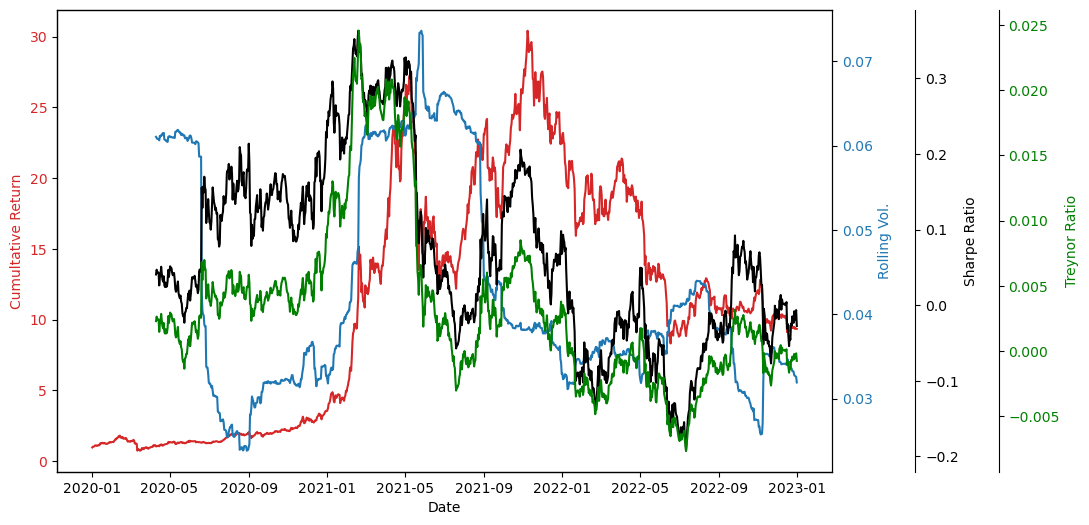

In [5]:
# plotting business

fig, ax = plt.subplots(figsize=(10,6))

color = 'tab:red'
ax.set_xlabel('Date')
ax.set_ylabel('Cumultative Return', color=color)
ax.plot(cum_r1.index, cum_r1, color=color)
ax.tick_params(axis='y', labelcolor=color)

ax2 = ax.twinx()
color = 'tab:blue'
ax2.set_ylabel('Rolling Vol.', color=color)
ax2.plot(roll_vol1.index, roll_vol1, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax.twinx()
color = 'k'
ax3.set_ylabel('Sharpe Ratio', color=color)
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(sharpe_ratio1.index, sharpe_ratio1, color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax.twinx()
color = 'green'
ax4.set_ylabel('Treynor Ratio', color=color)
ax4.spines['right'].set_position(('outward', 120))
ax4.plot(Treynor.index, Treynor, color=color)
ax4.tick_params(axis='y', labelcolor=color)

plt.show()
